<h1>Surf's Up: Advanced Data Storage & Retrieval</h1>

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

<p>These lines use SQLalchemy to convert the .sqlite database file into a format that python can use.</br>
<strong>create_engine</strong> makes what SQLalchemy documentation describes as the <em>starting point</em> for a db</br> 
<strong>automap_base</strong> makes the engine into classes</br>
<strong>ORM Session</strong> maps the classes into a useable format for python</br>
<strong>.keys</strong> looks at the class(es) and returns the table names</br>

In [3]:
surf_engine = create_engine("sqlite:///Resources/hawaii.sqlite")
surf_base = automap_base()
surf_base.prepare(surf_engine, reflect=True)
surf_base.classes.keys()

['measurement', 'station']

<strong>.classes</strong> makes <em>references</em> for the two original tables</br>
<strong>Session</strong> is a <em>holding zone</em> for the queries to be run</br>

In [4]:
Measurement = surf_base.classes.measurement
Station = surf_base.classes.station
Surf_ORM_Session = Session(surf_engine)

Here I use <strong>Pandas</strong> to read the .sqlite tables and perform queries and return as a datframe

In [5]:
import pandas as pd

xx = surf_engine.connect()
yy = pd.read_sql("SELECT * FROM measurement",xx)
yy.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


From nine stations we have daily measurements over a period of 7+ years

In [6]:
len(yy)

19550

Sorting by date, i return a dataframe in descending order to see the last day of measurement

In [7]:
yy.sort_values(by='date', ascending=False).head()

,id,station,date,prcp,tobs
19549,19550,USC00516128,2017-08-23,0.45,76.0
12186,12187,USC00519523,2017-08-23,0.08,82.0
2723,2724,USC00519397,2017-08-23,0.00,81.0
7634,7635,USC00514830,2017-08-23,0.00,82.0
12185,12186,USC00519523,2017-08-22,0.00,82.0


</br>
</br>
</br>
<strong>inspect</strong> is used to return information about the .sql tables in json form

In [8]:
zz = inspect(xx)
zz.get_table_names() 

['measurement', 'station']

In [9]:
zz.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

</br></br></br>

This is the table of the nine weather stations, each with  location and elevation

In [10]:
xxx = surf_engine.connect()
ee = "SELECT * FROM station"
yyy = pd.read_sql(ee,xxx)
yyy

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [11]:
zz = inspect(xx)
zz.get_table_names() 

['measurement', 'station']

In [12]:
zz.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

</br></br></br>
##### Here is a query that selects the readings for only the table's most recent year, reduces the table to just date and precip, which i then use to make a dataframe

In [13]:
aa = "SELECT measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs \
FROM measurement \
WHERE measurement.date BETWEEN '2016-08-24' AND '2017-08-23'\
LIMIT 10 ;"

surf_engine.execute(aa).fetchall()

[(2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0)]

In [14]:
bb = "SELECT measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs \
FROM measurement \
WHERE measurement.date BETWEEN '2016-08-24' AND '2017-08-23';"
xxxx = surf_engine.connect()
dddd = pd.read_sql(bb,xxxx)
dddd.head()

,id,station,date,prcp,tobs
0,2365,USC00519397,2016-08-24,0.08,79.0
1,2366,USC00519397,2016-08-25,0.08,80.0
2,2367,USC00519397,2016-08-26,0.00,79.0
3,2368,USC00519397,2016-08-27,0.00,77.0
4,2369,USC00519397,2016-08-28,0.01,78.0


In [15]:
cc = "SELECT measurement.date, measurement.prcp \
FROM measurement \
WHERE measurement.date BETWEEN '2016-08-24' AND '2017-08-23'\
LIMIT 10 ;"

surf_engine.execute(cc).fetchall()

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0)]

In [16]:
dd = "SELECT measurement.date, measurement.prcp \
FROM measurement \
WHERE measurement.date BETWEEN '2016-08-24' AND '2017-08-23'\
 ;"

xxxx = surf_engine.connect()
OneYearPrecip = pd.read_sql(dd,xxxx)
OneYearPrecip.set_index("date",inplace=True)
OneYearPrecip.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


</br></br>
<h4>Precipitation Chart</h4>
For the charts most recent year, August 24, 2016 - August 23, 2017, here is the amount of rainfall in inches 

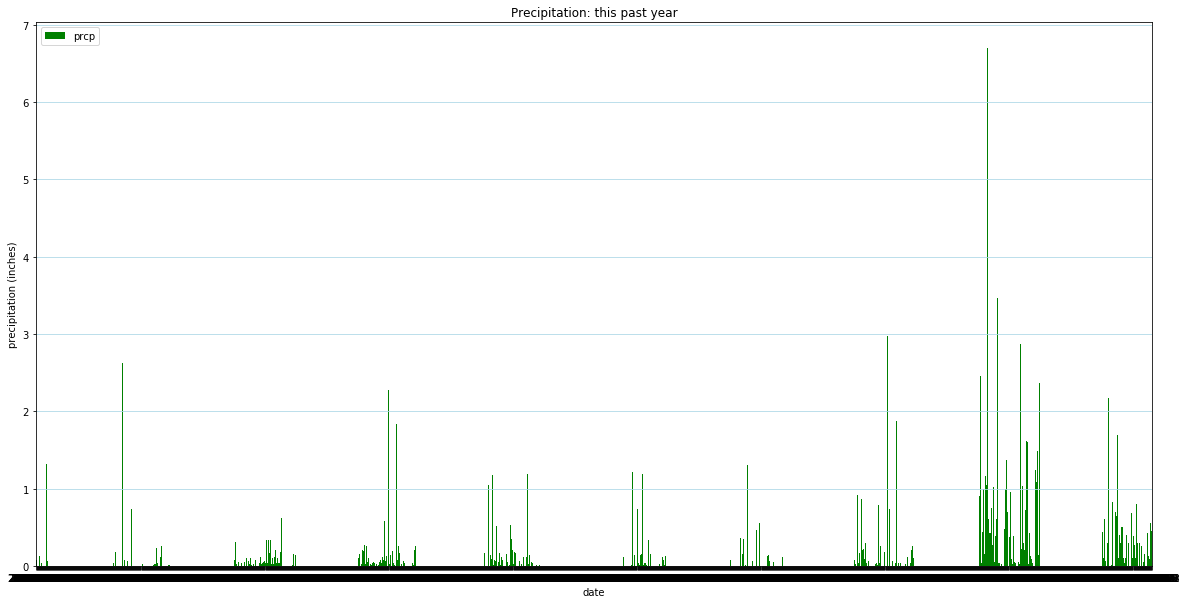

NameError: name 'xaxis' is not defined

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

OneYearPrecip.plot(kind="bar", figsize=(20,10),rot=0,facecolor="green", alpha=1,xticks=([0]))
plt.legend(loc=2)
plt.grid(axis="y",color="lightblue")
plt.title("Precipitation: this past year")
plt.xlabel("date")
plt.ylabel("precipitation (inches)")

plt.show()

<br>
<br>
<br>
Query to list station names and number of measurements contribiuted by each in descending order.

In [18]:
CountPerStation = "SELECT measurement.station, station.name, \
COUNT(measurement.station) AS 'station_count' \
FROM measurement \
LEFT JOIN station \
ON measurement.station = station.station \
GROUP BY measurement.station \
ORDER BY station_count DESC;"

surf_engine.execute(CountPerStation).fetchall()

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

The table above shows that Waihee station has the highest number of observations at 2772.

<br>
Next, I filter the measurement data to display the last years readings of the most productive station, Waihee

In [41]:
WaiheeLastYear = "SELECT measurement.date, measurement.station, measurement.tobs \
FROM measurement \
WHERE measurement.date BETWEEN '2016-08-24' AND '2017-08-23' \
AND measurement.station = 'USC00519281'"

# surf_engine.execute(WaiheeLastYear).fetchall()

xx = surf_engine.connect()
WaiheeLastYearDF = pd.read_sql(WaiheeLastYear,xx)
WaiheeLastYearDF.head()

,date,station,tobs
0,2016-08-24,USC00519281,77.0
1,2016-08-25,USC00519281,80.0
2,2016-08-26,USC00519281,80.0
3,2016-08-27,USC00519281,75.0
4,2016-08-28,USC00519281,73.0


Here is how i found the min and max temps measured to design the bins. I also observe the mean
and associated stats which gives me an indication of the eventual shape of the histogram

In [21]:
WaiheeLastYearDF.describe()

,tobs
count,351.000000
mean,73.096866
std,4.735491
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


Next, I count the days each individual temp was recorded, design the bins [temp range = 20deg, assignment calls for 12 bins]

In [26]:
WaiheeGrouped = WaiheeLastYearDF.groupby("tobs").count()
WaiheeGrouped.reset_index(inplace=True)
WaiheeGrouped.head()

,tobs,date,station
0,59.0,3,3
1,60.0,2,2
2,61.0,1,1
3,62.0,6,6
4,63.0,4,4


In [45]:
tobsBins = [59,61,63,65,67,69,71,73,75,77,79,81,83]
tobsBinIndex = ["59-61","62-63","64-65","66-67","68-69","70-71","72-73","74-75","76-77","78-79","80-81","82-83"]

WaiheeLastYearBin = pd.cut(WaiheeGrouped["tobs"], tobsBins,labels=tobsBinIndex)
WaiheeGrouped['TobsBins'] = pd.Series(WaiheeLastYearBin)
# WaiheeLastYearBin.head()
WaiheeGrouped.groupby('TobsBins').sum()

,tobs,date,station
TobsBins,,,
59-61,121.0,3,3
62-63,125.0,10,10
64-65,129.0,10,10
66-67,133.0,20,20
68-69,137.0,31,31
70-71,141.0,40,40
72-73,145.0,40,40
74-75,149.0,72,72
76-77,153.0,63,63


Turns out, all that munging and cutting can be done easily with Pandas.<br>
Here is the histogram showing the frequency of each two-degree temperature bin.

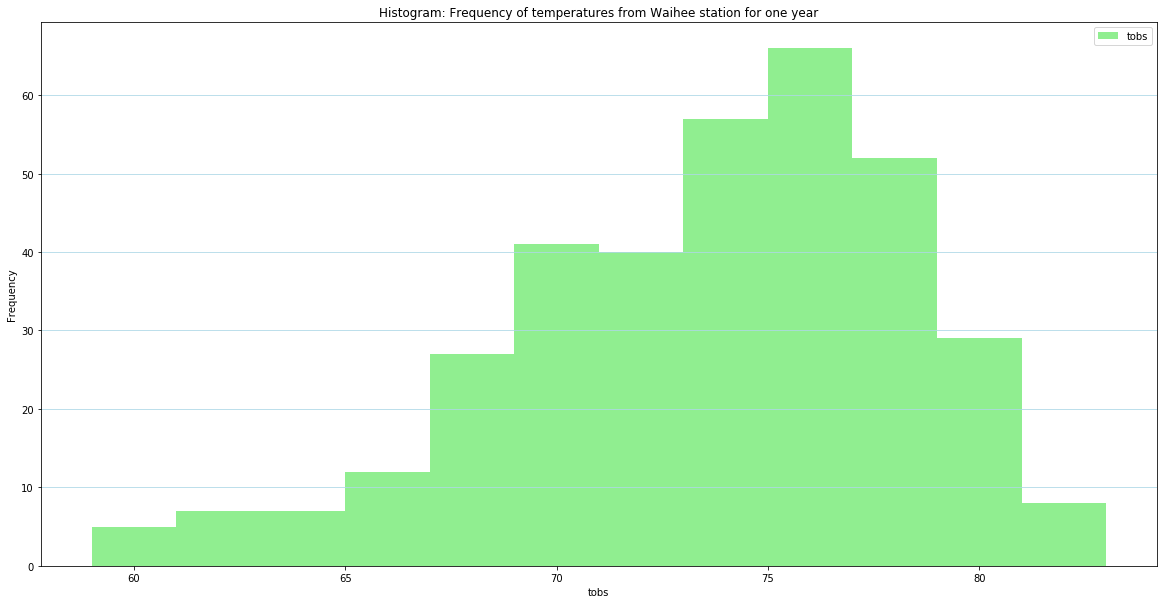

In [80]:
WaiheeLastYearDF.plot.hist(bins=12,figsize=(20,10),rot=0,facecolor="lightgreen", alpha=1)

plt.grid(axis="y",color="lightblue")
plt.title("Histogram: Frequency of temperatures from Waihee station for one year")
plt.xlabel("tobs")

plt.show()